# Classification Wound or soothing , healthy skin

- Problem definition and importance for the target group

Skin diseases are among the most common health concerns globally, affecting individuals across all demographics. Despite their prevalence, timely diagnosis and access to dermatological expertise remain significant challenges, especially in remote or underserved areas. Early detection and appropriate care can prevent complications, improve patient outcomes, and reduce healthcare costs.

The target group for this solution includes individuals who may lack immediate access to dermatologists, those seeking quick preliminary insights into their skin conditions, and healthcare providers requiring AI-assisted tools to enhance diagnosis. By offering a mobile-based solution, this project bridges the gap between patients and expert advice, fostering inclusivity and promoting preventive healthcare.


- Explanations of the reasons behind design selections

The design of the AI system leverages two key model architectures: a custom CNN model and a pre-trained VGG16-based model. The choice of these models was guided by their respective strengths and their 
ability to address the unique requirements of skin disease recognition. Below is a detailed explanation of these design selections:

1. Custom CNN Architecture
The custom CNN architecture was chosen for its flexibility and ability to be tailored specifically to the skin disease dataset. Here’s why this architecture was selected:

Lightweight and Efficient:

The custom CNN model is relatively small, allowing for fast training and inference, which is ideal for mobile applications. This is particularly important to provide a real-time user experience.
Layer Composition:

Conv2D Layers: The use of convolutional layers with ReLU activation helps extract essential features, such as texture and color variations, which are critical for distinguishing skin conditions.
MaxPooling: Pooling layers reduce dimensionality, retain the most relevant features, and prevent overfitting.
Dense Layers: Fully connected layers consolidate the learned features for classification, with a final softmax layer that outputs probabilities for the three skin disease classes.
Regularization and Dropout:

Dropout (set at 50%) is used in the dense layer to mitigate overfitting, ensuring better generalization on unseen data.
Target Use Case:

This architecture is ideal for smaller datasets and for deployment in resource-constrained environments (e.g., smartphones). It provides a good balance between performance and computational cost.

2. Pre-Trained VGG16 Model
The VGG16 model was integrated for its strong feature extraction capabilities, benefiting from its training on the large ImageNet dataset. Reasons for this choice include:

Transfer Learning:

VGG16 is pre-trained on millions of images, enabling it to generalize effectively, even on smaller datasets of skin disease images. Its robust convolutional layers are highly capable of identifying low- and high-level features (e.g., edges, textures, and patterns).
Fine-Tuning:

By unfreezing the top layers of the VGG16 model and retraining it on the skin disease dataset, the model adapts to domain-specific patterns while retaining the pre-trained knowledge. The "fine_tune_at" parameter ensures that only the most relevant layers are updated, reducing training time and avoiding overfitting.
High Accuracy Potential:

The depth of the VGG16 architecture, combined with its pre-trained weights, typically results in higher accuracy compared to custom models for similar tasks.
AdamW Optimizer:

The AdamW optimizer was selected for its ability to converge quickly and manage large-scale datasets. This improves the overall efficiency of the fine-tuning process.
Scalability and Real-World Use:

This architecture provides scalability, allowing future extensions to include additional skin disease classes without needing to redesign the system.


omparison of Models and Justification
Custom CNN Model:
Best suited for lightweight mobile applications where computational resources are limited. It acts as a baseline for performance evaluation.
VGG16 Pre-Trained Model:
Offers higher accuracy and robustness for production environments, particularly when dealing with complex patterns in images of skin conditions.
By combining these approaches, the system ensures flexibility, efficiency, and scalability. The custom CNN is ideal for initial prototyping and low-power environments, while the pre-trained VGG16 is used for scenarios requiring higher precision and robustness. This layered approach ensures the solution meets both user needs and technical requirements effectively.


- Originality of the idea/approach
- Novelty of AI-based solution
- Presentation of the performence highlights
- Coherence of the executive level report (3-4 pages of report)
- Real-time presentation (max. 10 minutes of presentation)

#### Datasets

- Wound:
1. Wound_dataset
2. Abrasions
3. Bruises
4. Cut
5. Laceration
6. stab_wound

- Bites:
1. ants
2. bed_bugs
3. chiggers
4. fleas
5. mosqutios
6. spiders
7. ticks

- Skin:
1. healthy skin

# Load our data in train and test df

In [9]:
import os
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


# Ścieżka do folderu z danymi
skin_data_path_train = r'E:\Deep_Learning\Skin diseases\data_wbh/train'
skin_data_path_test = r'E:\Deep_Learning\Skin diseases\data_wbh/test' 


# Lista klas
classes = ['Bite', 'Healthy Skin', 'Wound']

# Słownik do przechowywania plików z przypisanymi klasami
files_train_with_classes = {}
files_test_with_classes = {}

# Przechodzenie przez foldery klas
for class_name in classes:
    class_path = os.path.join(skin_data_path_train, class_name)

    if os.path.isdir(class_path):
        # Przechodzenie przez podfoldery w każdej klasie
        for subfolder in os.listdir(class_path):
            subfolder_path = os.path.join(class_path, subfolder)
            if os.path.isdir(subfolder_path):
                # Przechodzenie przez pliki w podfolderach
                for file in os.listdir(subfolder_path):
                    file_path_train = os.path.join(subfolder_path, file)
                    if os.path.isfile(file_path_train):
                        files_train_with_classes[file_path_train] = class_name
            else:
                # Przechodzenie przez pliki w folderze klasy
                file_path_train = os.path.join(class_path, subfolder)
                if os.path.isfile(file_path_train):
                    files_train_with_classes[file_path_train] = class_name

for class_name in classes:
    class_path = os.path.join(skin_data_path_test, class_name)
    if os.path.isdir(class_path):
        # Przechodzenie przez podfoldery w każdej klasie
        for subfolder in os.listdir(class_path):
            subfolder_path = os.path.join(class_path, subfolder)
            if os.path.isdir(subfolder_path):
                # Przechodzenie przez pliki w podfolderach
                for file in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path, file)
                    if os.path.isfile(file_path):
                        files_test_with_classes[file_path] = class_name
            else:
                # Przechodzenie przez pliki w folderze klasy
                file_path = os.path.join(class_path, subfolder)
                if os.path.isfile(file_path):
                    files_test_with_classes[file_path] = class_name


train_df = pd.DataFrame(files_train_with_classes.items(), columns=['file_path', 'label'])
test_df = pd.DataFrame(files_test_with_classes.items(), columns=['file_path', 'label'])

# Spliting our data into valid and test

In [10]:
test_df.label.groupby(test_df.label).count()

label
Bite            200
Healthy Skin    123
Wound            42
Name: label, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

valid_df , test_df = train_test_split(test_df, test_size=0.5, random_state=42 , shuffle=True)

In [12]:
print(valid_df.label.groupby(valid_df.label).count())


label
Bite            94
Healthy Skin    67
Wound           21
Name: label, dtype: int64


In [13]:
print(test_df.label.groupby(test_df.label).count())

label
Bite            106
Healthy Skin     56
Wound            21
Name: label, dtype: int64


# Some sample photos

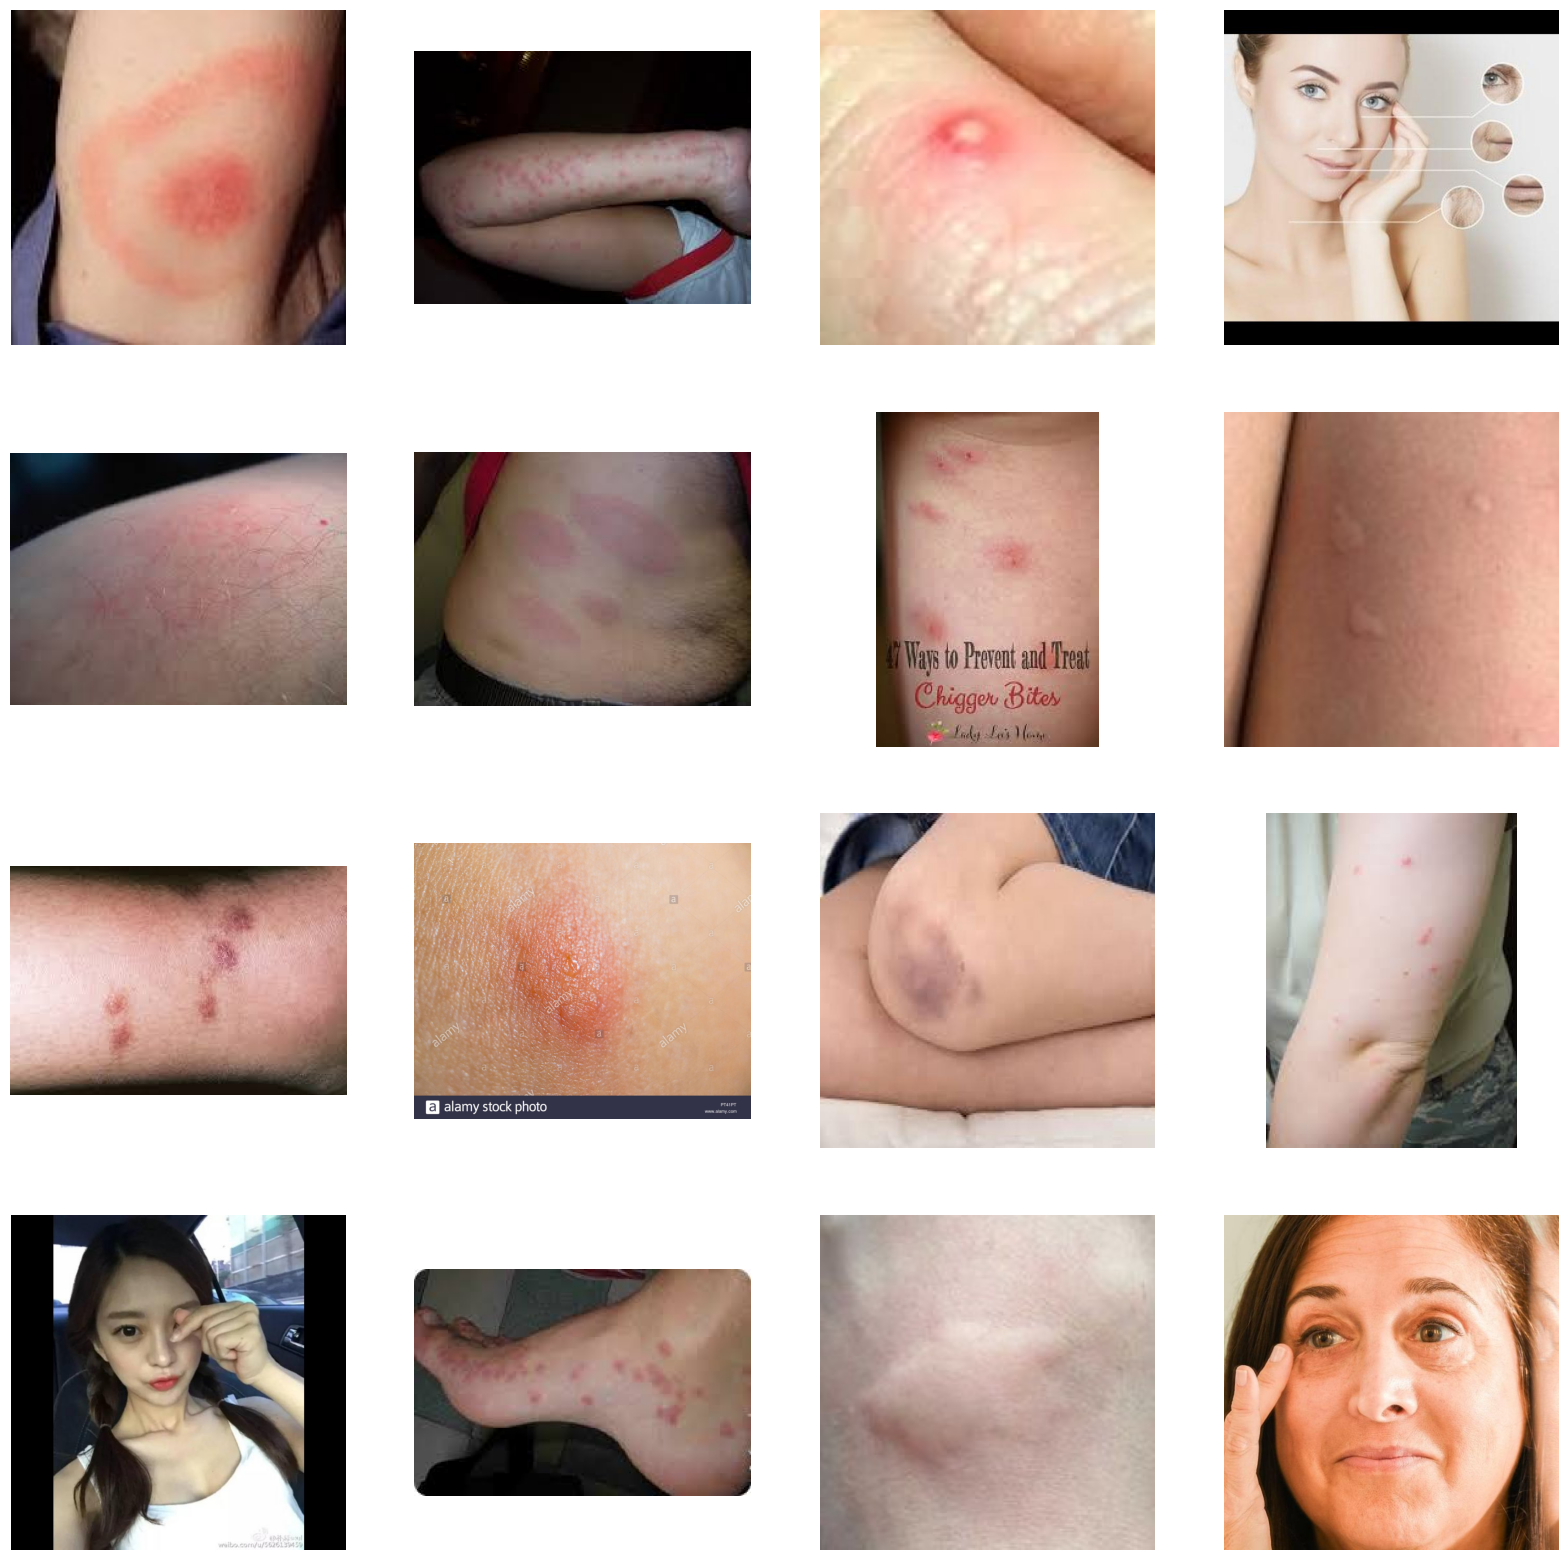

In [14]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize = (20 ,20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = cv2.imread(test_df.file_path.iloc[i])
    
    if img is not None:  
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')

plt.show()

# Data augumentation

Data augmentation - a technique that allows to increase the training set by appropriate transformation of the input data. A very useful technique especially when we do not have enough data to train the network. In deep learning, the more training data we have, the better we are theoretically able to train the network. We will use this technique to train image processing problems.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
IMAGE_SIZE = 150
channels = 3

train_datagen = ImageDataGenerator(rotation_range=40,      # Random rotation within 40 degrees
                                  rescale= 1.0/255,        # Rescale pixel values to [0, 1]
                                  width_shift_range=0.2,   # Random horizontal shift by 20% of image width
                                  height_shift_range=0.2,  # Random vertical shift by 20% of image height
                                  shear_range=0.2,         # Random shear range from 80% to 120%
                                  zoom_range=0.2,          # Random zoom range  80% to 120%
                                  horizontal_flip=True,    # Random horizontal flipping
                                  vertical_flip = True,    # Random vertical flipping
                                  fill_mode='nearest'      # Fill mode for new pixels after shifts/rotations
                    )

valid_datagen = ImageDataGenerator(rescale=1.0/255) 
test_datagen  = ImageDataGenerator(rescale=1.0/255) 

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                    x_col = "file_path",
                                                    y_col = "label",
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    color_mode = "rgb",
                                                    shuffle = True)

test_generator = test_datagen.flow_from_dataframe(dataframe = test_df ,
                                                  x_col = "file_path",
                                                  y_col = "label",
                                                  target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = "categorical",
                                                  color_mode = "rgb",
                                                  shuffle = False)

valid_datagen = valid_datagen.flow_from_dataframe(dataframe = valid_df,
                                                    x_col = "file_path",
                                                    y_col = "label",
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    color_mode = "rgb",
                                                    shuffle = True)

Found 1400 validated image filenames belonging to 3 classes.
Found 183 validated image filenames belonging to 3 classes.
Found 182 validated image filenames belonging to 3 classes.


# Create a basic model

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import AdamW , Adam , RMSprop 
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf

def get_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, channels)))

    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Transfer Learning (VGG 16)

The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. The model’s architecture features a stack of convolutional layers followed by max-pooling layers, with progressively increasing depth. This design enables the model to learn intricate hierarchical representations of visual features, leading to robust and accurate predictions. Despite its simplicity compared to more recent architectures, VGG-16 remains a popular choice for many deep learning applications due to its versatility and excellent performance.

In [27]:
from tensorflow.keras.applications import VGG16
from kerastuner import HyperParameters as hp

def get_pretrained_model(hp):
    base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, channels),
                       include_top=False,
                       weights='imagenet')
    
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        BatchNormalization(),

        # First fully connected layer
        Dense(units=hp.Choice("units1", min_value=32, max_value=512, step=32), activation=hp.Choice("activation1", values=['relu', 'selu', 'elu'])),
        Dropout(hp.Float('dropout1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)),
        BatchNormalization(),

        # Second fully connected layer
        Dense(units=hp.Choice("units2", min_value=32, max_value=512, step=32), activation=hp.Choice("activation2", values=['relu', 'selu', 'elu'])),
        Dropout(hp.Float('dropout2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)),
        BatchNormalization(),

        # Third fully connected layer
        Dense(units=hp.Choice("units3", min_value=32, max_value=512, step=32), activation=hp.Choice("activation3", values=['relu', 'selu', 'elu'])),
        Dropout(hp.Float('dropout3', min_value=0.0, max_value=0.5, default=0.25, step=0.05)),
        BatchNormalization(),
        
        Dense(3, activation='softmax')
    ])
    
    # Fine-tuning and Regularization
    base_model.trainable = True  # Unfreeze the base model
    fine_tune_at = 100           # Number of layers to freeze. Adjust based on model architecture
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    model.compile(optimizer=AdamW(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

    return model

In [56]:
def get_best_model(units1, activation1, dropout1, units2, dropout2,units3, dropout3, optimizer="AdamW"):
    base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, channels),
                       include_top=False,
                       weights='imagenet')

    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        BatchNormalization(),

        # First fully connected layer
        Dense(units=units1, activation=activation1),
        Dropout(dropout1),
        BatchNormalization(),

        # Second fully connected layer
        Dense(units=units2, activation=activation1),
        Dropout(dropout2),
        BatchNormalization(),

        # Third fully connected layer
        Dense(units=units3, activation=activation1),
        Dropout(dropout3),
        BatchNormalization(),
        
        # Output layer
        Dense(len(classes), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [51]:

from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    get_pretrained_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameters_gridsearch',
    project_name='skin_disease_classification'
)

tuner.search(train_generator, epochs=10, validation_data=valid_datagen)

Reloading Tuner from hyperparameters_gridsearch\skin_disease_classification\tuner0.json


In [52]:
tuner.results_summary()

Results summary
Results in hyperparameters_gridsearch\skin_disease_classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
units1: 384
activation1: relu
dropout1: 0.4
units2: 480
dropout2: 0.25
units3: 480
dropout3: 0.05
Score: 0.9120879173278809

Trial 06 summary
Hyperparameters:
units1: 480
activation1: elu
dropout1: 0.15000000000000002
units2: 512
dropout2: 0.2
units3: 352
dropout3: 0.25
Score: 0.9120879173278809

Trial 02 summary
Hyperparameters:
units1: 64
activation1: elu
dropout1: 0.0
units2: 416
dropout2: 0.15000000000000002
units3: 64
dropout3: 0.35000000000000003
Score: 0.906593382358551

Trial 09 summary
Hyperparameters:
units1: 288
activation1: relu
dropout1: 0.25
units2: 128
dropout2: 0.15000000000000002
units3: 352
dropout3: 0.15000000000000002
Score: 0.901098906993866

Trial 00 summary
Hyperparameters:
units1: 512
activation1: selu
dropout1: 0.0
units2: 192
dropout2: 0.15000000000000002
units3: 448
dropout3

In [53]:
# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'units1': 384,
 'activation1': 'relu',
 'dropout1': 0.4,
 'units2': 480,
 'dropout2': 0.25,
 'units3': 480,
 'dropout3': 0.05}

In [59]:
# Extract the best hyperparameters
units1 = best_hps.get('units1')
activation1 = best_hps.get('activation1')
dropout1 = best_hps.get('dropout1')
units2 = best_hps.get('units2')
dropout2 = best_hps.get('dropout2')
units3 = best_hps.get('units3')
dropout3 = best_hps.get('dropout3')

# Build the model with the best hyperparameters
model_pretrained_v0 = get_best_model(units1=units1,
                                     activation1=activation1,
                                     dropout1=dropout1,
                                     units2=units2,
                                     dropout2=dropout2,
                                     units3=units3,
                                     dropout3=dropout3)

model_pretrained_v0.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 384)            │     3,146,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 384)            │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 480)            │       184,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 480)            │         1,920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 480)            │       230,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 480)            │         1,920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │         1,443 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,316,067 (69.87 MB)

 Trainable params: 3,582,307 (13.67 MB)

 Non-trainable params: 14,733,760 (56.20 MB)

In [21]:
model_v0 = get_model()
model_v0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 750,659 (2.86 MB)

 Trainable params: 750,659 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
import shutil

# Clear any logs from previous runs
shutil.rmtree('./logs/', ignore_errors=True)

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau , TensorBoard
import tempfile
import datetime

%reload_ext tensorboard


check_dir = r'E:\Deep_Learning\Skin diseases\checkpoints'
checkpoint_filepath = r'E:\Deep_Learning\Skin diseases\checkpoints/checkpoint.weights.h5'
checkpoint_filepath_pretrained = r'E:\Deep_Learning\Skin diseases\checkpoints/pretrained_model.weights.h5'

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


#model_v0.load_weights(checkpoint_filepath)

if not os.path.exists(check_dir):
    os.makedirs(check_dir)

es = EarlyStopping(monitor='val_loss', 
                   mode='max', 
                   patience=5, 
                   verbose=1)


cb = ModelCheckpoint(filepath=checkpoint_filepath_pretrained,
                     save_weights_only=True,
                     monitor='val_accuracy',
                     mode='max',
                     save_best_only=True)


reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5)

ts = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [64]:
#model_pretrained_v0.load_weights(checkpoint_filepath_pretrained)

history_pretrained_v0 = model_pretrained_v0.fit(x=train_generator, 
                                                validation_data=valid_datagen, 
                                                epochs=20, callbacks=[cb ,ts])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6728 - loss: 1.4267 - val_accuracy: 0.8462 - val_loss: 0.4419
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7637 - loss: 0.7363 - val_accuracy: 0.6813 - val_loss: 0.6384
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8037 - loss: 0.5941 - val_accuracy: 0.6538 - val_loss: 0.6690
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8130 - loss: 0.5743 - val_accuracy: 0.7198 - val_loss: 0.6790
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8113 - loss: 0.5227 - val_accuracy: 0.7363 - val_loss: 0.6444
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8082 - loss: 0.5418 - val_accuracy: 0.7308 - val_loss: 0.6682
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 665ms/step - accuracy: 0.7997 - loss: 0.5400 - val_accuracy: 0.7582 - val_loss: 0.6375
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 667ms/step - accuracy: 0.8142 - loss: 0.5197 - val_accuracy: 0.8022 - val

In [67]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6012 (pid 66336), started 0:00:23 ago. (Use '!kill 66336' to kill it.)

In [68]:
model_pretrained_v0.save_weights(checkpoint_filepath_pretrained)

In [17]:
history = model_v0.fit(train_generator, validation_data=valid_datagen, epochs=15, callbacks=[cb , es , reduce_lr])

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6257 - loss: 1.0348 - val_accuracy: 0.5165 - val_loss: 1.1147 - learning_rate: 0.0010
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6602 - loss: 0.8607 - val_accuracy: 0.5275 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6455 - loss: 0.8739 - val_accuracy: 0.7418 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7004 - loss: 0.8017 - val_accuracy: 0.7418 - val_loss: 0.6976 - learning_rate: 0.0010
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6936 - loss: 0.8026 - val_accuracy: 0.7363 - val_loss: 0.6374 - learning_rate: 0.0010
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6962 - loss: 0.8042 - val_accuracy: 0.8187 - val_loss: 0.5659 - learning_rate: 0.0010
Epoch 6: early stopping


In [69]:
ts_length = len(valid_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

valid_score = model_pretrained_v0.evaluate(test_generator, steps= test_steps, verbose= 1)
    
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.8762 - loss: 0.3019
Validation Loss:  0.29850709438323975
Validation Accuracy:  0.8797814249992371


In [71]:
model_pretrained_v1 = get_best_model(units1=units1,
                                     activation1=activation1,
                                     dropout1=dropout1,
                                     units2=units2,
                                     dropout2=dropout2,
                                     units3=units3,
                                     dropout3=dropout3)
model_pretrained_v1.load_weights(checkpoint_filepath_pretrained)

In [72]:
import gradio as gr


def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded correctly from path: {image_path}")
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img = img.reshape(1, IMAGE_SIZE, IMAGE_SIZE, channels)
    img = img / 255.0
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model_pretrained_v1.predict(img)
    confidences = {cls: float(conf) for cls, conf in zip(classes, prediction[0])}
    return confidences

demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="filepath"), 
    outputs=gr.Label(num_top_classes=3)
    
)
    
demo.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Traceback (most recent call last):
  File "C:\Users\dzago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dzago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dzago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gradio\blocks.py", line 2044, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dzago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\L

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
